<a href="https://colab.research.google.com/github/Het0c/ep3Machine/blob/main/Arbol_de_decision_CSgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import tree
import os
from google.colab import files

# Cargar datos

if not os.path.exists("csgo_datos_limpios.csv"):
  uploaded = files.upload()

df = pd.read_csv("csgo_datos_limpios.csv", sep=",")

df.head()


<ipython-input-3-998746cd08e6>:17: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("csgo_datos_limpios.csv", sep=",")


,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


# Una revision de los atributos para determinar cuales serian el target y el predictor

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0
PrimaryPistol,79157.0,0.221787,0.415451,0.0,0.0,0.0,0.0,1.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0


# Filtracion y seleccion variables

In [10]:
# Filtrar registros sin errores (por ejemplo, solo aquellos donde "AbnormalMatch" es False)
df_clean = df[df["AbnormalMatch"] == False].copy()

# Seleccionar variables numéricas (features) y el target para predecir MatchKills
features = [
    "RoundKills",
    "RoundAssists",
    "RoundHeadshots",
    "RLethalGrenadesThrown",
    'MatchWinner',
]
target = "MatchKills"  # Número total de kills en la partida




In [11]:
# Extraer las variables predictoras y el target, manejando los nulos
X = df_clean[features].fillna(df_clean[features].mean())
y = df_clean[target].fillna(df_clean[target].mean())

# División en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el árbol de decisión, limitando la profundidad para evitar sobreajuste
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [12]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Árbol de Decisión: Variables predictoras -> MatchKills")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Árbol de Decisión: Variables predictoras -> MatchKills
Error cuadrático medio (MSE): 35.99
Error absoluto medio (MAE): 4.94
Coeficiente de determinación (R²): 0.07


# Visualizar el árbol de decisión

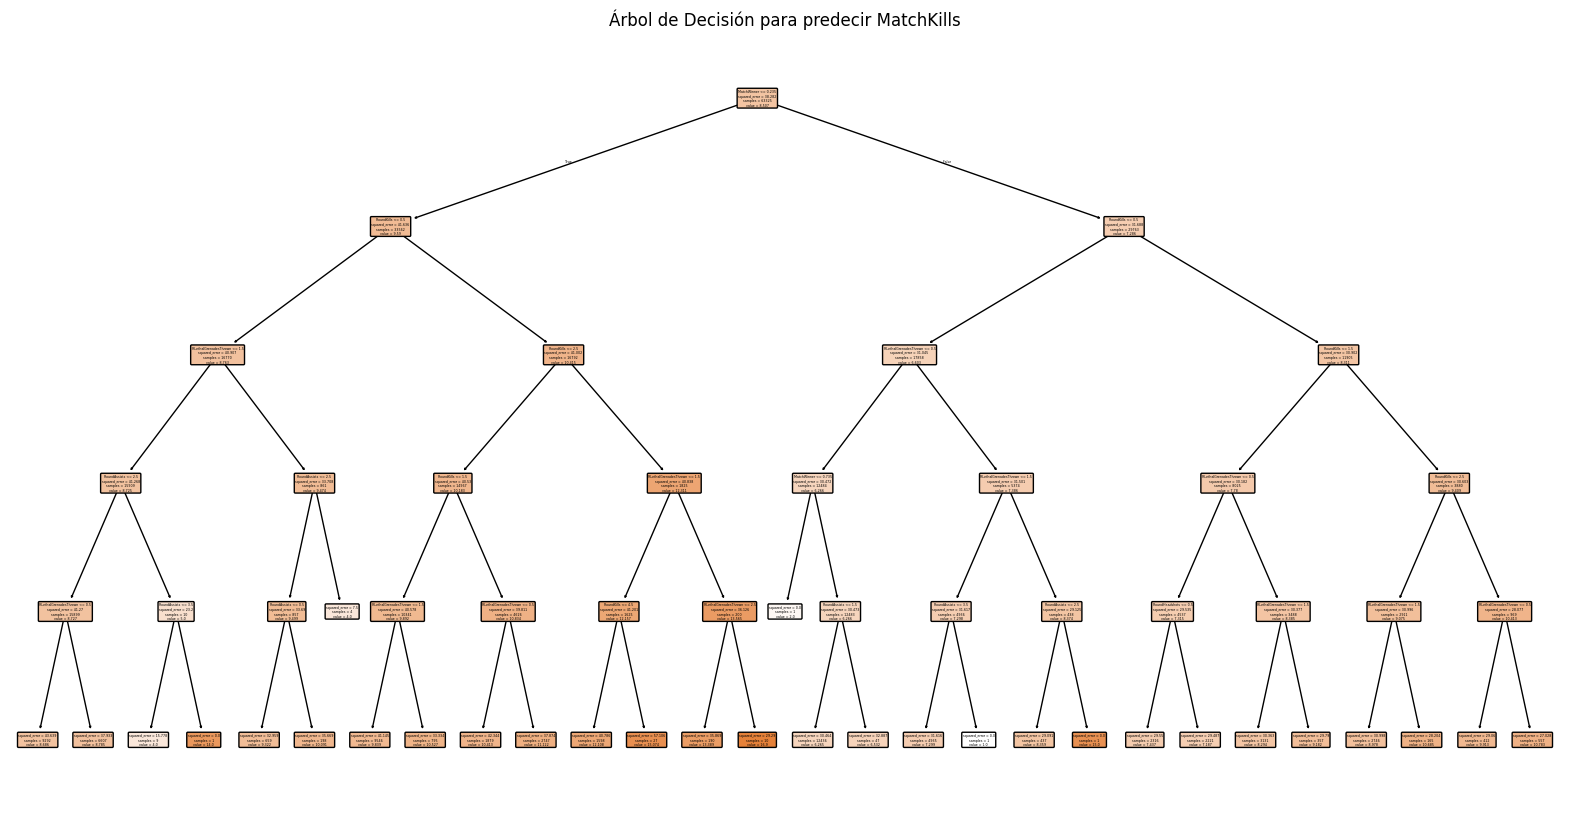

In [13]:
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=features, filled=True, rounded=True)
plt.title("Árbol de Decisión para predecir MatchKills")
plt.show()

MSE (35.99): Indica que, en promedio, la suma de los errores al cuadrado es relativamente alta.

MAE (4.94): Significa que el modelo se equivoca, en promedio, por aproximadamente 5 kills al hacer la predicción.

R² (0.07): Solo el 7% de la variabilidad en MatchKills es explicada por el modelo, lo que evidencia una capacidad explicativa muy limitada.

analisis:

Árbol de decisión: La visualización del árbol, limitado a 5 niveles, muestra splits basados en RoundKills, RoundAssists, RoundHeadshots, RLethalGrenadesThrown y MatchWinner. Sin embargo, los nodos finales tienen valores de predicción muy parecidos y no se observa una separación clara en grupos, lo que indica que estos cortes no discriminan bien los niveles de MatchKills.

Gráfico de dispersión: Al comparar los valores reales y las predicciones, los puntos se dispersan ampliamente respecto a la línea ideal, lo que confirma visualmente la baja capacidad explicativa del modelo y la alta variabilidad en las predicciones.